<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function

import os
import itertools
import numpy as np
import scipy.stats as sts
import pickle
import pandas as pd
import re
import timeit
import warnings

from glob import glob
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from statsmodels.stats.proportion import proportion_confint
from tqdm import tqdm_notebook

# disable warning in Anaconda
warnings.filterwarnings('ignore')

In [2]:
# Functions

def dict_modify(d1, d2):
    '''Adding frequence count (second tuple element) from dict2 to dict1
    d1 ->  site_freq_users_all
    d2 ->  site_freq_common_users
    '''
    d1_keys = set(d1.keys())
    d2_keys = set(d2.keys())
    intersect_keys = d1_keys.intersection(d2_keys)
    return {sites : (d1[sites][0], d1[sites][1] + d2[sites][1]) for sites in intersect_keys}


def incomplete_condition(user_data_eval, session_length):
    '''Condition for determining incomplete session'''
    if not user_data_eval.shape[0] % session_length == 0:   
        # Fill zeros for incomplete session
        for index in range( user_data_eval.shape[0], (user_data_eval.shape[0] // session_length + 1)*session_length ):
            user_data_eval.loc[index] = [0, 0]

def intersect1d_set(A,B):
    '''Intersection elements for lists'''
    if not B:
        result = []
    else: result = list( set.intersection(set(B),set(A)) )    
    return result


def sparse_csr(array2D):
    '''
    make data, indices, indptr for sparse matrix
    array2D - input array'''
    data = []
    indices = []
    indptr = [0]
    for array in array2D:
        unique, counts = np.unique(array[array != 0], return_counts=True)
        indptr.append(indptr[-1] + len(unique))
        for u, c in zip(unique, counts):
            indices.append(u - 1)
            data.append(c)
    return data, indices, indptr


def setdiff1d_modify(A,B):
    '''Differets elements of lists'''
    if not B:
        result = A
    else: result = np.array( list( set(A) - set(B) ), dtype=object )
    return result


def window_session_items(session_length, window_length, array_size):
    '''index of windowed session length'''
    
    # first index
    start_index = (session_length + 1) - (session_length - window_length)
    tmp_start = start_index
    indexs = [1]
    indexs.append(start_index)
    while tmp_start < array_size:   
        tmp_start =  tmp_start +  window_length
        indexs.append(tmp_start)
    first_index = indexs[:-1]

        # second index
    step_index = session_length - start_index
    second_index = [session_length]
    tmp_end = [*map(lambda x: x + step_index, first_index[2:])]
    tmp_end = [*map(lambda x: x if x < array_size else array_size, tmp_end)]
    second_index = second_index + tmp_end
    second_index.append(array_size)

    return zip(first_index, second_index)

def prepare_sparse_train_set_window(path_to_csv_files, path_pckl_file, session_length=10, window_length=7):
    
    # Str numeration for site
    site_numeration = ['site' + str(index + 1) for index in range(session_length)]

    # Inicnjdhtial dataframe
    resultData_all = pd.DataFrame(columns=(site_numeration + ['user_id']))
    # Initial unique site and index for them
    unique_site_all = []
    index_list_all = []
    site_freq_users_all = dict()
    user_id = 0
    start_index = 0

    def adding_algorytm(user_data):
        '''adding sessions to the dataframe'''
    
        nonlocal user_id, resultData_all
        #User id value
        user_id = user_id + 1 
        # Copy of daraframe for main algorytm
        user_data_eval = user_data.copy() 
       
        # Condition for determining incomplete session
        incomplete_condition(user_data_eval, session_length)
    
        # Main alhortm of replacing str sites for numbers
        slice_index = [*map(lambda x: (x[0] - 1, x[1] - 1),\
                        window_session_items(session_length, window_length, user_data_eval['site'].shape[0]))]
        sessions_length = [*map(lambda x: x[1] - x[0] + 1, slice_index)]
        #sessions_range = [*map(np.arange, sessions_length)]

        all_sessions = [*map(lambda x: user_data_eval['site'].values[x[0]:x[1]+1], slice_index)]
        sessions = len(sessions_length)

        resultData = pd.DataFrame(data=all_sessions, index=np.arange(sessions), columns=site_numeration)
        resultData = resultData.fillna(0)

        # resultData add user id
        resultData['user_id'] = pd.Series(user_id, index=resultData.index)
    
        # Store to the global value
        resultData_all = resultData_all.append(resultData, ignore_index=True)
        
    def path_to_csv(path_to_csv_files, PATH_TO_PROJECT='~/geekhubds/HW09'):
        ''' Path to data - csv files'''
        # File operations
        file_quant = len(glob(path_to_csv_files))
        file_names = [file for file in glob(path_to_csv_files)]
        file_length = len(file_names)
        # Import csv files
        user_data = [pd.read_csv(os.path.join(PATH_TO_PROJECT,file)) for file in file_names]
        return user_data
    
    def path_to_plc(path_pckl_file):
        ''' Path to data - pckl file'''
        with open(path_pckl_file, 'rb') as site_freq:
            site_freq = pickle.load(site_freq)
        def replace_func(site_freq):
            '''Creation replace dic from site freq dictionary'''
            return {site:site_freq.get(site)[0] for site in site_freq.keys()}
        
        return replace_func(site_freq)

   
    # Main algorytm

    # Import csv files 
    user_data = path_to_csv(path_to_csv_files) 

    # Import replace dictionary
    replasment = path_to_plc(path_pckl_file)
            
    # Replacing str sites for numbers
    [*map(adding_algorytm, user_data)];

    #Replacing site_id in column and delete NANs
    for site in site_numeration:
        resultData_all[site] = resultData_all[site].map(replasment.get)
    resultData_all = resultData_all.fillna(0).astype(int)
    
    # crs matrix algorytm
    X_users, y_users = resultData_all.iloc[:, :-1].values, resultData_all.iloc[:, -1].values
    
    data_users, indices_users, indptr_users = sparse_csr(X_users)
    X_sparse_users = csr_matrix((data_users, indices_users, indptr_users), dtype=int)
    
    return X_sparse_users, y_users

In [3]:
%%time
path_to_csv_files = '3users\*'
path_pckl_file = 'site_freq_3users.pkl'
X_sparse_users, y_users =  \
                prepare_sparse_train_set_window(path_to_csv_files, path_pckl_file, session_length=10, window_length=7)

Wall time: 224 ms


In [4]:
X_sparse_users.todense()

matrix([[1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 4, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [5]:
path_to_csv_files = '3users\*'
path_pckl_file = 'site_freq_3users.pkl'
X_toy_s5_w3, y_s5_w3 =  prepare_sparse_train_set_window(path_to_csv_files, path_pckl_file, 5, 3)

In [6]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [13]:
%%time

data_lengths_dic = []
data_lengths = []

#inputdata
num_users = (('10users\*', 'site_freq_10users.pkl'),('150users\*', 'site_freq_150users.pkl'))


for users in num_users:
    
    # User number
    number_users = int(re.findall(r'\d+', users[0])[0])
    
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            
            X_sparse, y = prepare_sparse_train_set_window(users[0], users[1], session_length, window_size)
            
            data_lengths_dic.append({(session_length,window_size):X_sparse.shape[0]})
            data_lengths.append(X_sparse.shape[0])
            
            #store pickle files
            with open(f'X_sparse_{number_users}users_s{session_length}_w{window_size}.pkl', 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(f'y_{number_users}users_s{session_length}_w{window_size}.pkl', 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            
            print(f'Users:{number_users} session:{session_length} window:{window_size} matrix length:{X_sparse.shape[0]}')

Users:10 session:15 window:10 matrix length:14065
Users:10 session:15 window:7 matrix length:20093
Users:10 session:10 window:7 matrix length:20090
Users:10 session:7 window:7 matrix length:20087
Users:10 session:15 window:5 matrix length:28125
Users:10 session:10 window:5 matrix length:28122
Users:10 session:7 window:5 matrix length:28124
Users:10 session:5 window:5 matrix length:28118
Users:150 session:15 window:10 matrix length:137094
Users:150 session:15 window:7 matrix length:195821
Users:150 session:10 window:7 matrix length:195785
Users:150 session:7 window:7 matrix length:195712
Users:150 session:15 window:5 matrix length:274098
Users:150 session:10 window:5 matrix length:274038
Users:150 session:7 window:5 matrix length:274027
Users:150 session:5 window:5 matrix length:273957
Wall time: 6min 56s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [14]:
print('   Unique values in the data_lengths list:', len( np.unique(data_lengths) ))

   Unique values in the data_lengths list: 16


## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [8]:
train_df = pd.read_csv('train_data_10users.csv', index_col='session_id')

In [9]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,1
1,6,7,8,9,3,10,11,12,13,14,1
2,14,4,14,14,15,16,6,17,18,14,1
3,19,20,19,14,14,14,14,21,22,23,1
4,24,14,15,25,26,27,28,29,30,29,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [11]:
train_df['user_id'].value_counts()

7     2796
3     2204
8     1868
6     1712
9     1643
2     1022
4      802
1      760
5      720
10     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [23]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [24]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

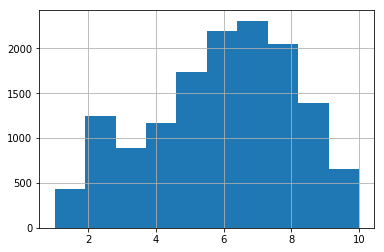

In [25]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

Test: Its near to Normal like


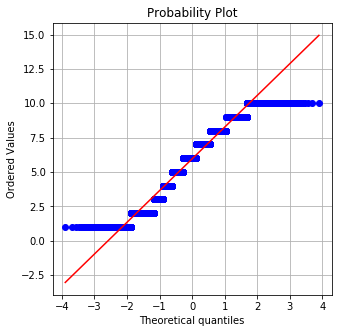

In [28]:
# Check result if the obtained distribution is normal

# Test Shapiro
test_z_2, test_pval_2 = sts.shapiro(pd.Series(num_unique_sites).value_counts())
if(test_pval_2 < 0.05):
    print("Test: Its not normal distribution")
else: print("Test: Its near to Normal like")

# QQ plot
fig, axs = plt.subplots(1,figsize=(5, 5))
axs.grid(True)
sts.probplot(num_unique_sites, plot=plt);

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [29]:
print(f'p-value = {test_pval_2} \n')

if(test_pval_2 < 0.05):
    print("Test: Its not normal distribution")
else: print("Test: Its Normal like")

p-value = 0.7007318139076233 

Test: Its Normal like


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [30]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [31]:
pi_val = sts.binom_test(sum(has_two_similar), n=has_two_similar.shape[0], p=0.95)/2
print('Answer: ', pi_val)

Answer:  0.02209189603162069


**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [32]:
wilson_interval = proportion_confint(has_two_similar.sum(), has_two_similar.shape[0], method='wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [33]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

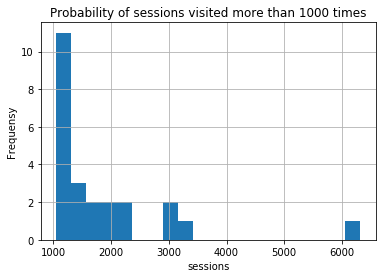

In [17]:
with open('site_freq_10users.pkl', 'rb') as site_freq:
    site_freq_10users = pickle.load(site_freq)

site_freqs = [value[1][1] for value in site_freq_10users.items() if value[1][1] > 1000]

# Histogram
fig, axs = plt.subplots()
axs.grid(True)

plt.hist(site_freqs, bins = 20)

plt.title('Probability of sessions visited more than 1000 times')
plt.ylabel('Frequensy')
plt.xlabel('sessions');

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [18]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [19]:
# Dictionary and its sizes
site_freqs_all = [value[1][1] for value in site_freq_10users.items()]
quant_dict = np.array(site_freqs_all).shape[0]

In [20]:
# Get data from dictionary
data = get_bootstrap_samples(np.array(site_freqs_all), quant_dict)
# Mean function
mean_data = [*map(np.mean, data)]

l_side, r_side = stat_intervals(mean_data, 0.05)
print(f'Left interval: {l_side:.3f}  Right invteravl {r_side:.3f}')

Left interval: 24.386  Right invteravl 33.554


## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.